# We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

1. represents low damage
2. represents a medium amount of damage
3. represents almost complete destruction

In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc,classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [100]:
X_train = pd.read_csv('/Users/apple/5243AppliedDS/Modeling-Earthquake-Damage-main/Resources/Datasets/X_train.csv')
y_train = pd.read_csv('/Users/apple/5243AppliedDS/Modeling-Earthquake-Damage-main/Resources/Datasets/y_train.csv')
X_test = pd.read_csv('/Users/apple/5243AppliedDS/Modeling-Earthquake-Damage-main/Resources/Datasets/X_test.csv')
y_test = pd.read_csv('/Users/apple/5243AppliedDS/Modeling-Earthquake-Damage-main/Resources/Datasets/y_test.csv')
y_train = y_train['damage_grade']
y_test = y_test['damage_grade']
X_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,716310,21,935,5965,3,20,6,6,0,1,...,False,False,False,False,False,False,False,False,True,False
1,283080,3,1229,1099,2,20,6,5,1,1,...,False,False,False,False,False,False,False,False,True,False
2,690774,21,1219,2705,3,45,6,5,0,1,...,False,False,False,False,False,False,False,False,False,True
3,904803,20,158,2452,2,10,7,5,0,0,...,False,False,False,False,False,False,False,False,True,False
4,991971,9,670,5977,2,0,9,6,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208475,819626,8,1184,830,1,10,6,5,0,1,...,False,False,False,False,False,False,False,False,True,False
208476,865223,4,144,5751,2,0,8,4,0,1,...,False,False,False,False,False,False,False,False,True,False
208477,363536,27,548,1119,3,20,19,7,1,0,...,False,False,False,False,False,False,False,False,True,False
208478,402196,17,1030,606,2,15,8,8,0,0,...,False,False,False,False,False,False,False,False,True,False


In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# keep the columns name for data
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0.627305,0.884794,0.566307,-0.080726,1.197536,-0.088956,-0.458306,0.297285,-0.311769,0.558159,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247
1,-0.795012,-1.356591,1.279024,-1.415839,-0.178044,-0.088956,-0.458306,-0.226390,3.207508,0.558159,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247
2,0.543469,0.884794,1.254782,-0.975192,1.197536,0.251137,-0.458306,-0.226390,-0.311769,0.558159,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,-5.081102,9.780223
3,1.246137,0.760273,-1.317303,-1.044609,-0.178044,-0.224993,-0.231009,-0.226390,-0.311769,-1.791604,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247
4,1.532315,-0.609463,-0.076108,-0.077434,-0.178044,-0.361031,0.223585,0.297285,-0.311769,-1.791604,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208475,0.966497,-0.733984,1.169935,-1.489646,-1.553624,-0.224993,-0.458306,-0.226390,-0.311769,0.558159,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247
208476,1.116194,-1.232070,-1.351242,-0.139443,-0.178044,-0.361031,-0.003712,-0.750064,-0.311769,0.558159,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247
208477,-0.530871,1.631923,-0.371862,-1.410352,1.197536,-0.088956,2.496554,0.820959,3.207508,-1.791604,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247
208478,-0.403948,0.386709,0.796607,-1.551106,-0.178044,-0.156975,-0.003712,1.344633,-0.311769,-1.791604,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247


In [102]:
pca = PCA(n_components=0.40)  # Adjust n_components
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)
X_train_pca = X_train_pca
X_test_pca = X_test_pca
# print the number of components
# print(pca.n_components_)
# # I want to know which components are left
# print(pca.explained_variance_ratio_)



In [103]:
model = GaussianNB()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.39      0.46      0.42      5025
           2       0.62      0.29      0.39     29652
           3       0.40      0.74      0.52     17444

    accuracy                           0.46     52121
   macro avg       0.47      0.50      0.45     52121
weighted avg       0.52      0.46      0.44     52121



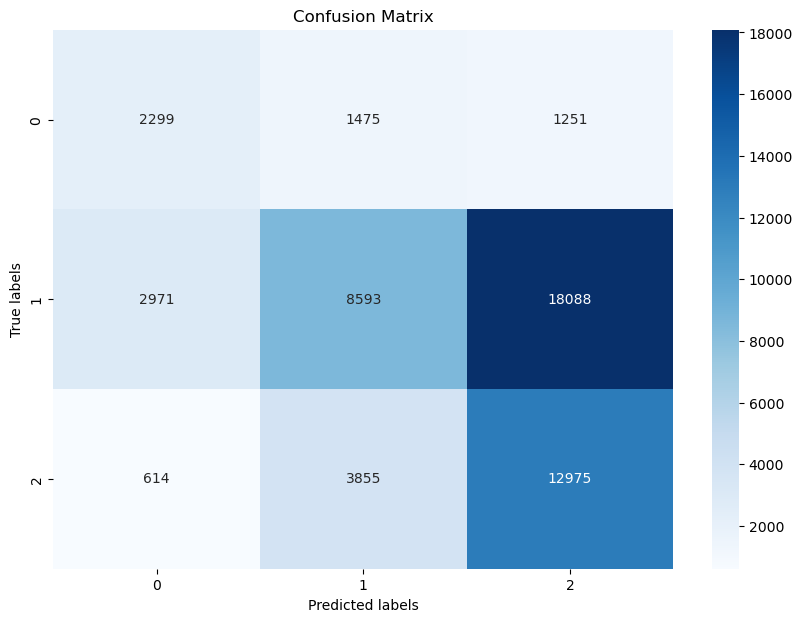

In [104]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [105]:
y_test_auc = pd.get_dummies(y_test)
y_pred_auc = pd.get_dummies(y_pred)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_auc.iloc[:, i], y_pred_auc.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
roc_auc

{0: 0.6906956617456288, 1: 0.5262896176867261, 2: 0.5930596123043255}

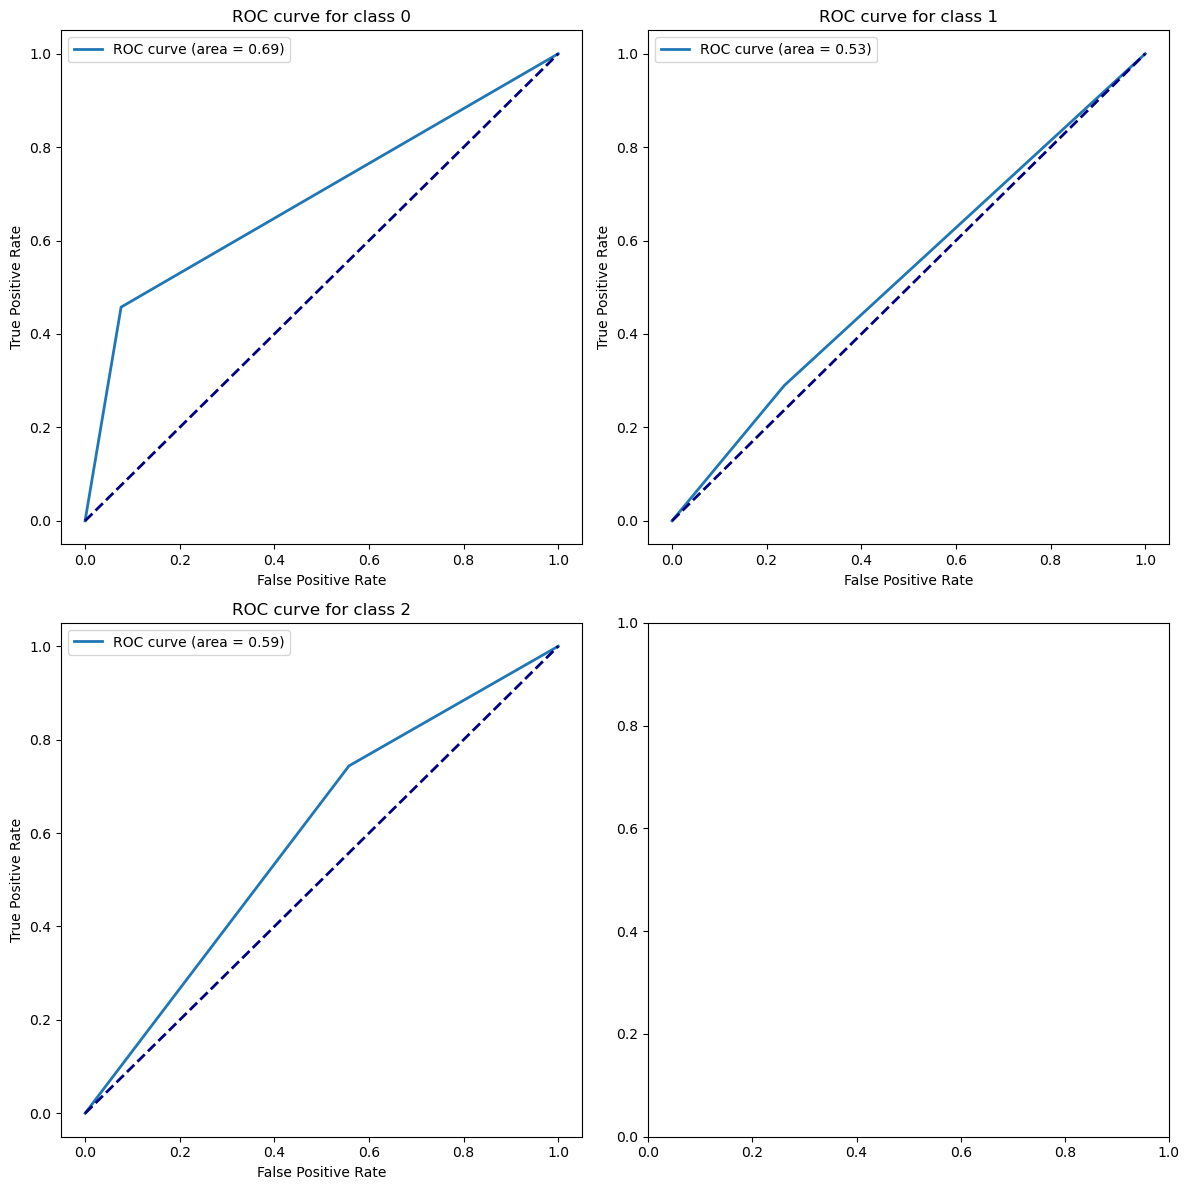

In [106]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Creates a 2x2 grid of Axes objects
axs = axs.ravel()  # Ravel turns a matrix into a vector, which is easier to iterate
for i in range(3):
    axs[i].plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    axs[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i].set_title('ROC curve for class {}'.format(i))
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].legend(loc='best')

plt.tight_layout()
plt.show()


In [107]:
# create a balanced dataset
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
class_counts = train['damage_grade'].value_counts()
test_class_counts = test['damage_grade'].value_counts()
min_class_count = class_counts.min()
min_class_test_count = test_class_counts.min()
# Use DataFrame.groupby and sample to resample each class
balanced_train = train.groupby('damage_grade').apply(lambda x: x.sample(min_class_count))
balanced_test = test.groupby('damage_grade').apply(lambda x: x.sample(min_class_test_count))
balanced_train = balanced_train.reset_index(drop=True)
balanced_test = balanced_test.reset_index(drop=True)

# shuffle the dataset
balanced_train = balanced_train.sample(frac=1)
balanced_test = balanced_test.sample(frac=1)

# drop the last column for X_train and the last colomn for y_train
balanced_X_train = balanced_train.drop('damage_grade', axis=1)
balenced_X_test = balanced_test.drop('damage_grade', axis=1)
balanced_y_train = balanced_train['damage_grade']
balanced_y_test = balanced_test['damage_grade']
balenced_X_test



,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
13973,932062,6,994,12131,2,10,3,6,0,1,...,False,False,False,False,False,False,False,False,True,False
6941,130799,5,1284,868,2,15,10,5,0,1,...,False,False,False,False,False,False,False,False,True,False
2803,240875,6,673,12181,3,10,7,11,0,0,...,False,False,False,False,False,False,False,False,True,False
10560,597235,17,229,12318,2,20,7,5,1,1,...,False,False,False,False,False,False,False,False,True,False
5112,801187,0,766,6357,2,10,6,5,0,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3764,520453,6,592,10323,3,0,12,9,0,0,...,False,False,False,False,False,False,False,False,True,False
7254,420695,13,308,10487,2,90,6,5,0,1,...,False,False,False,False,False,False,False,False,True,False
7188,545686,26,1132,3071,2,10,3,7,0,0,...,False,False,False,False,False,False,False,False,True,False
484,110755,26,227,12110,2,30,2,4,0,1,...,False,False,False,False,False,False,False,False,True,False


In [108]:
scaler = StandardScaler()
balanced_X_train_scaled = scaler.fit_transform(balanced_X_train)
balenced_X_test_scaled = scaler.transform(balenced_X_test)

In [109]:
pca = PCA(n_components=0.20)  # Adjust n_components
# balanced_X_train_pca = pca.fit_transform(balanced_X_train_scaled)
# balenced_X_test_pca = pca.transform(balenced_X_test_scaled)
# len(balenced_X_test_pca[0])
balanced_X_train_pca = balanced_X_train_pca
balenced_X_test_pca = balenced_X_test_pca

In [110]:
balenced_NB_clf = GaussianNB()
balenced_NB_clf.fit(balanced_X_train_pca, balanced_y_train)


GaussianNB()

In [111]:
y_pred = balenced_NB_clf.predict(balenced_X_test_pca)
print(classification_report(balanced_y_test, y_pred))

              precision    recall  f1-score   support

           1       0.33      0.17      0.23      5025
           2       0.33      0.64      0.44      5025
           3       0.33      0.18      0.23      5025

    accuracy                           0.33     15075
   macro avg       0.33      0.33      0.30     15075
weighted avg       0.33      0.33      0.30     15075



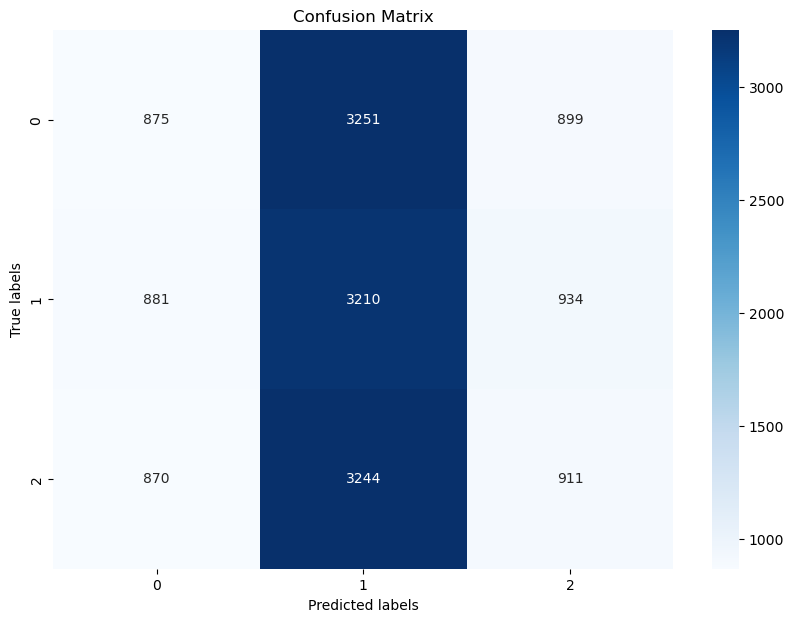

In [112]:
cm = confusion_matrix(balanced_y_test, y_pred)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [113]:
y_test_auc = pd.get_dummies(balanced_y_test)
y_pred_auc = pd.get_dummies(y_pred)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_auc.iloc[:, i], y_pred_auc.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
roc_auc

{0: 0.4999502487562189, 1: 0.49626865671641796, 2: 0.499452736318408}

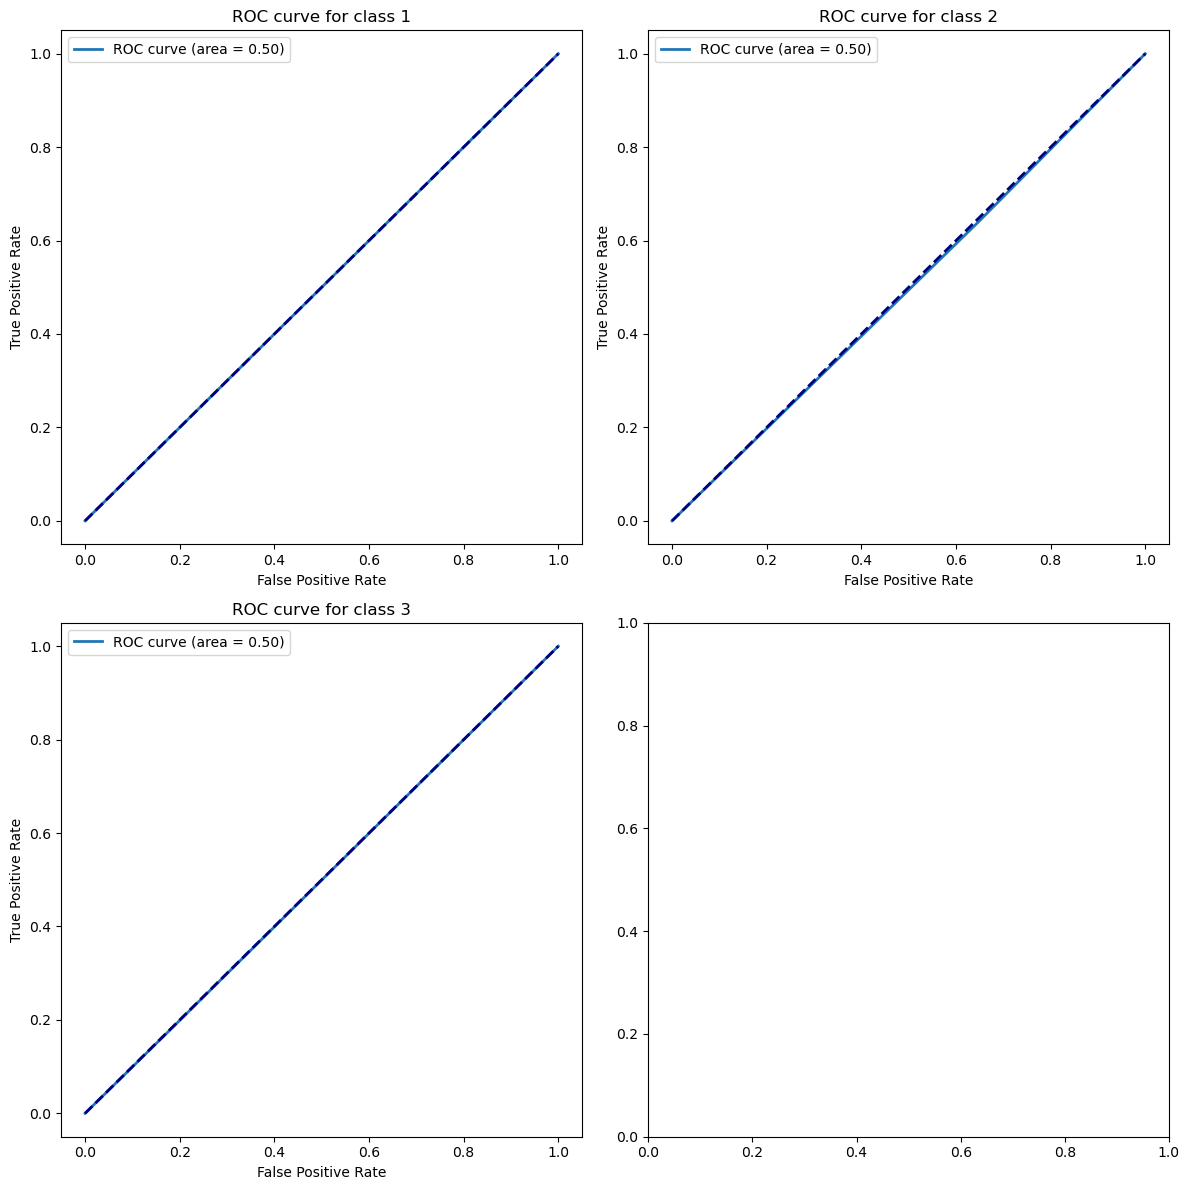

In [114]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Creates a 2x2 grid of Axes objects
axs = axs.ravel()  # Ravel turns a matrix into a vector, which is easier to iterate
for i in range(3):
    axs[i].plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    axs[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i].set_title('ROC curve for class {}'.format(i+1))
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].legend(loc='best')

plt.tight_layout()
plt.show()
